# HIPC Visualisations
## Original Analysis

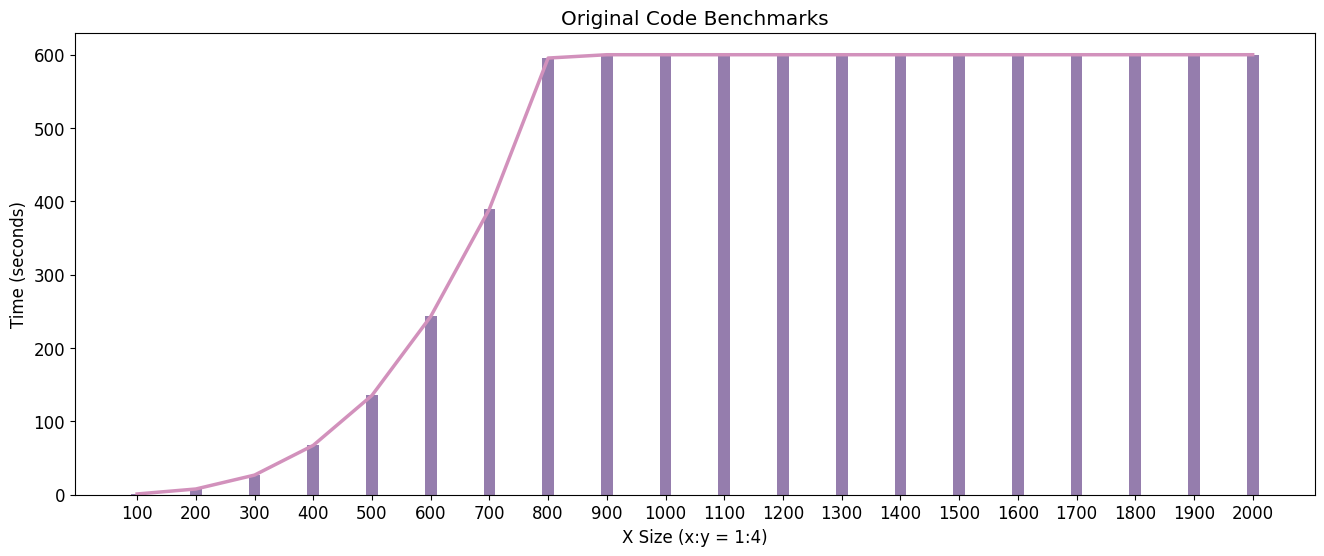

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 12})

# Loads in the original data into a csv
original_data = pd.read_csv("validation/original_benchmarks_data.csv", header=None)  
orig_df = pd.DataFrame(original_data)

# Set column labels and add average for the runs
orig_df.columns=["labels" ,"run1", "run2", "run3"]
orig_df["average"] = orig_df[['run1', 'run2', 'run3']].mean(axis=1)

# Reorders the entries based on x size
a = orig_df.labels.str.split(' ').str[0].str[2:].astype(int).sort_values()
orig_df = orig_df.reindex(index=a.index)

Y_POS = np.arange(len(orig_df["average"]))

# Plot the data using bar() method
plt.figure(figsize=(16,6))

plt.bar(Y_POS, orig_df["average"], width=0.2, color='#957DAD')
plt.xticks(Y_POS, a)

plt.title("Original Code Benchmarks")
plt.xlabel("X Size (x:y = 1:4)")
plt.ylabel("Time (seconds)")

  
# Show the plot
plt.show()

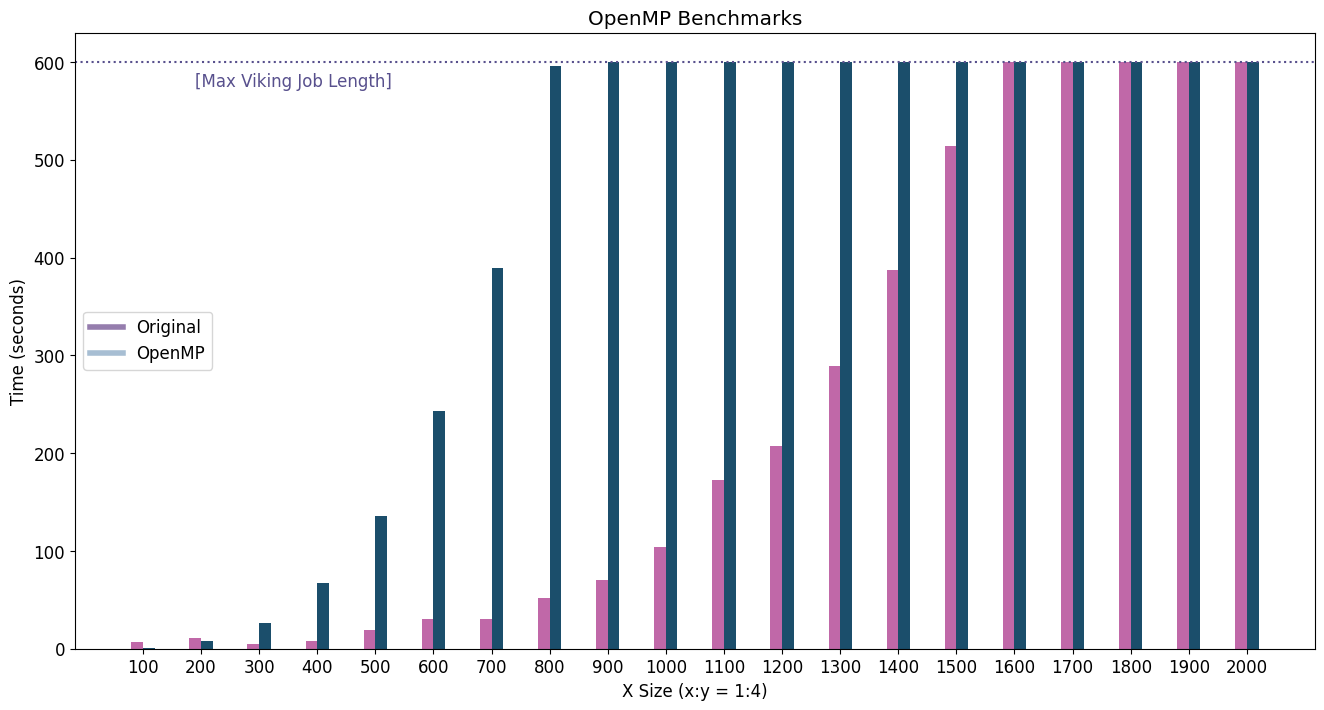

In [2]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#957DAD', lw=4),
                Line2D([0], [0], color='#a7bed3', lw=4)]

width = 0.2

# Loads in the original data into a csv
omp_data = pd.read_csv("validation/openmp_benchmarks_data.csv", header=None)  
omp_df = pd.DataFrame(omp_data)

# Set column labels and add average for the runs
omp_df.columns=["labels" ,"run1", "run2", "run3"]
omp_df["average"] = omp_df[['run1', 'run2', 'run3']].mean(axis=1)

# Reorders the entries based on x size
a = omp_df.labels.str.split(' ').str[0].str[2:].astype(int).sort_values()
omp_df = omp_df.reindex(index=a.index)


# Plot the data using bar() method
plt.figure(figsize=(16,8))

plt.bar(Y_POS, omp_df["average"], width=width, color='#C068A8')
plt.bar(Y_POS+ width, orig_df["average"], width=width, color='#1B4E6B')
plt.xticks(Y_POS + width/2, a)

plt.axhline(y=600, color='#58508D', linestyle='dotted')
plt.text(1,575,'[Max Viking Job Length]', color='#58508D')

plt.legend(custom_lines, ['Original', 'OpenMP'])


plt.title("OpenMP Benchmarks")
plt.xlabel("X Size (x:y = 1:4)")
plt.ylabel("Time (seconds)")

  
# Show the plot
plt.show()

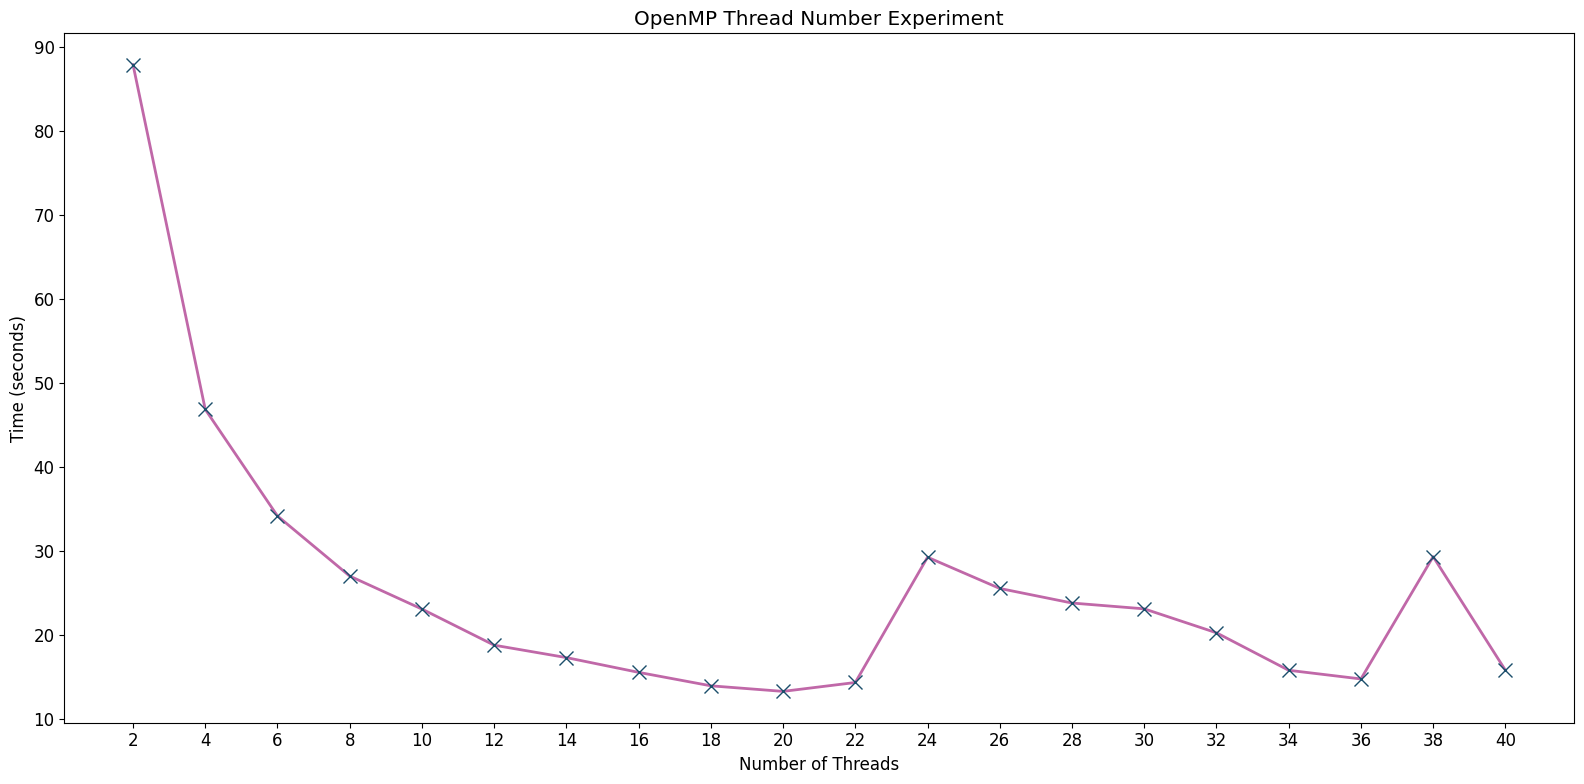

In [3]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#957DAD', lw=4),
                Line2D([0], [0], color='#a7bed3', lw=4)]

width = 0.2

# Loads in the original data into a csv
cpu_exp_df = pd.read_csv("validation/openmp_cpu_experiment_data.csv", header=None)  
cpu_exp_df = pd.DataFrame(cpu_exp_df)

# Set column labels and add average for the runs
cpu_exp_df.columns=["labels" ,"run"]

# Reorders the entries based on x size
a = cpu_exp_df.labels.str.split('=').str[1].astype(int).sort_values()
cpu_exp_df = cpu_exp_df.reindex(index=a.index)

# Plot the data using bar() method
plt.figure(figsize=(16,8))

plt.plot(a, cpu_exp_df["run"], color='#C068A8', linewidth=2)
plt.plot(a, cpu_exp_df["run"], 'x', color='#1B4E6B', markersize=10)
plt.xticks(a)

plt.title("OpenMP Thread Number Experiment")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")

plt.tight_layout()
# Show the plot
plt.show()

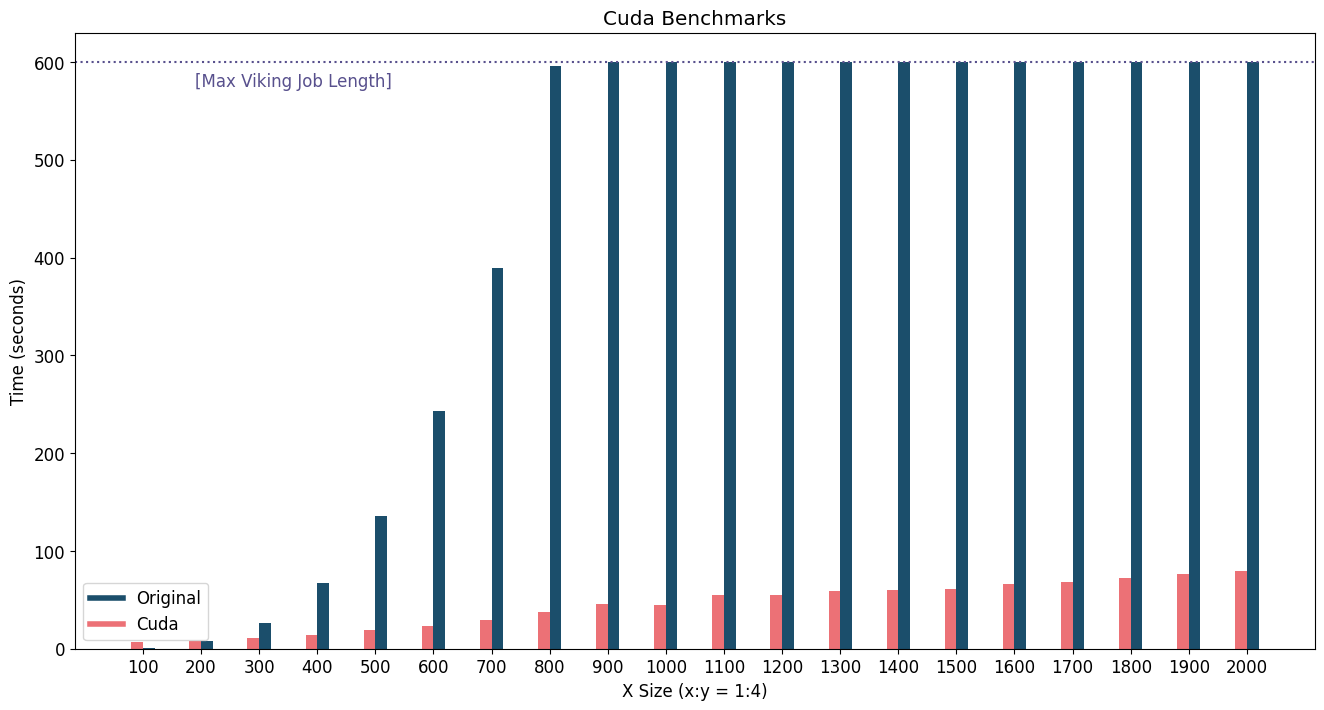

In [4]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1B4E6B', lw=4),
                Line2D([0], [0], color='#EC7176', lw=4)]

width = 0.2

# Loads in the original data into a csv
cuda_data = pd.read_csv("validation/cuda_benchmarks_data.csv", header=None)  
cuda_df = pd.DataFrame(cuda_data)

# Set column labels and add average for the runs
cuda_df.columns=["labels" ,"run1", "run2", "run3"]
cuda_df["average"] = cuda_df[['run1', 'run2', 'run3']].mean(axis=1)

# Reorders the entries based on x size
a = cuda_df.labels.str.split(' ').str[0].str[2:].astype(int).sort_values()
cuda_df = cuda_df.reindex(index=a.index)


# Plot the data using bar() method
plt.figure(figsize=(16,8))

plt.bar(Y_POS, cuda_df["average"].head(20), width=width, color='#EC7176')
plt.bar(Y_POS + width, orig_df["average"], width=width, color='#1B4E6B')
plt.xticks(Y_POS + width/2, a.head(20))

plt.axhline(y=600, color='#58508D', linestyle='dotted')
plt.text(1,575,'[Max Viking Job Length]', color='#58508D')

plt.legend(custom_lines, ['Original', 'Cuda'])


plt.title("Cuda Benchmarks")
plt.xlabel("X Size (x:y = 1:4)")
plt.ylabel("Time (seconds)")

# # Show the plot
plt.show()


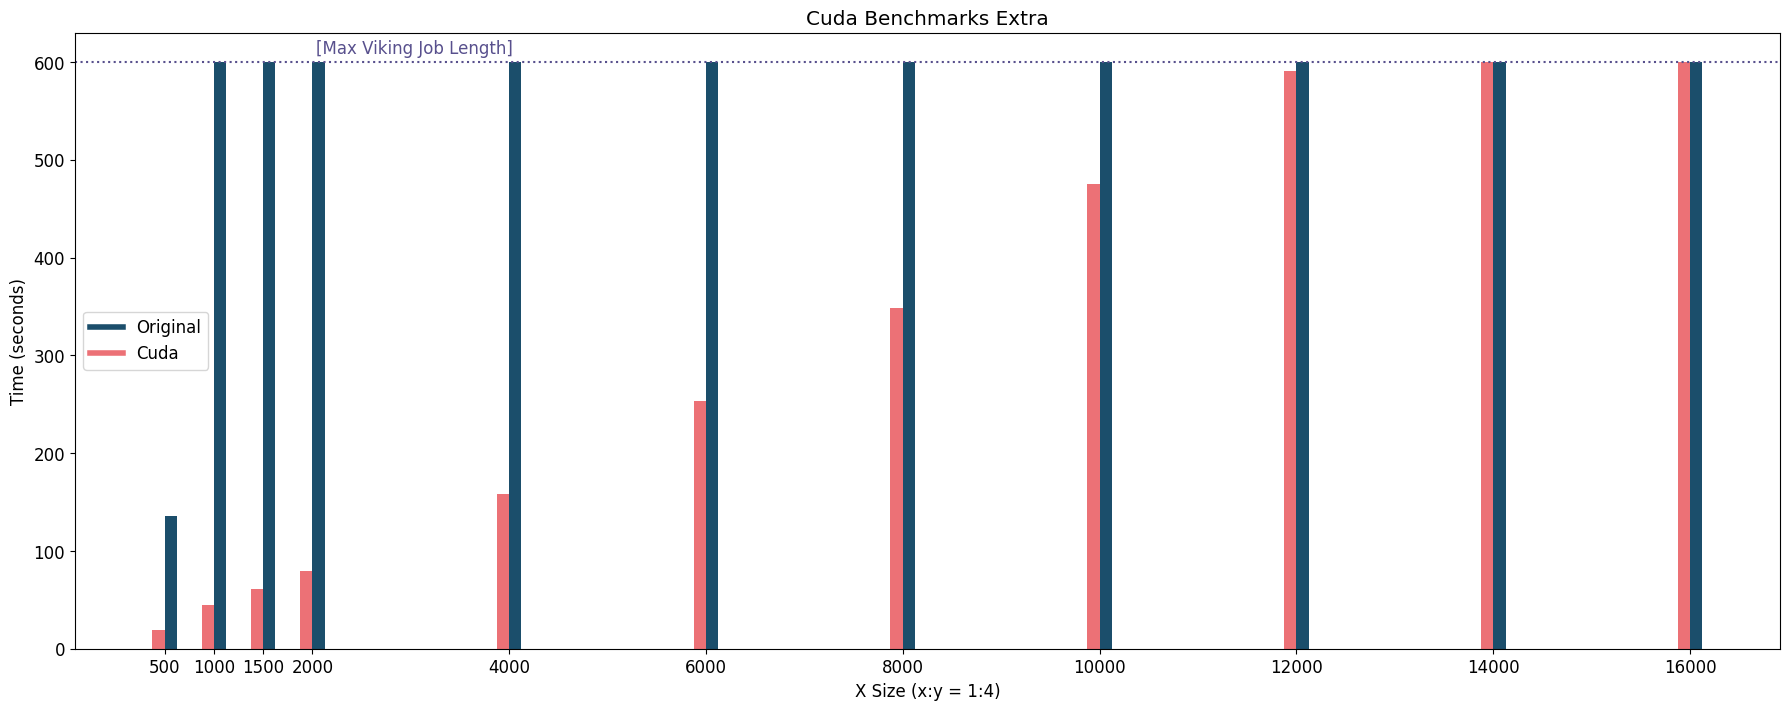

In [5]:
width = 125
ticks = [500, 1000, 1500] + [int(x) for x in list(a) if x % 2000 == 0]

orig_pos = [int(x) + width for x in ticks]
tick_loc = [int(x) + width / 2 for x in ticks]

cuda_extra = cuda_df.loc[[4, 8, 13, 19, 21, 22, 23, 24, 25, 20, 26]]
orig_extra = orig_df.loc[[4, 18, 13, 7]]

for i in range(7):
    new_row = {'labels':f"{i} added", 'run1':600, 'run2': 600, 'run3': 600, 'average':600}
    orig_extra = pd.concat([orig_extra, pd.DataFrame([new_row])], ignore_index=True)

a = cuda_extra.labels.str.split(' ').str[0].str[2:].astype(int).sort_values()
cuda_extra = cuda_extra.reindex(index=a.index)

# Plot the data using bar() method
plt.figure(figsize=(22,8))

plt.bar(ticks, cuda_extra["average"], width=width, color='#EC7176')
plt.bar(orig_pos, orig_extra["average"], width=width, color='#1B4E6B')
plt.xticks(tick_loc, ticks)

plt.axhline(y=600, color='#58508D', linestyle='dotted')
plt.text(2100,609,'[Max Viking Job Length]', color='#58508D')

plt.legend(custom_lines, ['Original', 'Cuda'])


plt.title("Cuda Benchmarks Extra")
plt.xlabel("X Size (x:y = 1:4)")
plt.ylabel("Time (seconds)")

  
# Show the plot
plt.show()

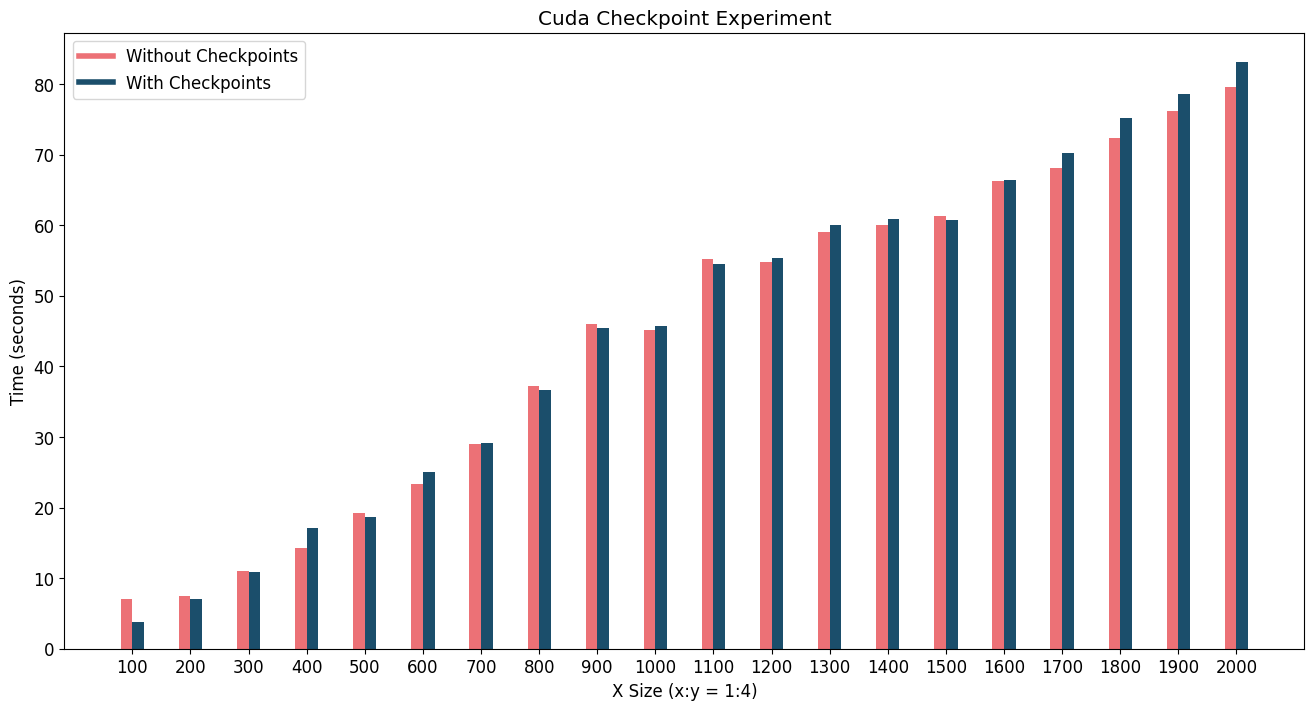

In [6]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#EC7176', lw=4),
                Line2D([0], [0], color='#1B4E6B', lw=4)]

width = 0.2

# Loads in the original data into a csv
cuda_checkpoint_data = pd.read_csv("validation/cuda_checkpoint_experiment_data.csv", header=None)  
cuda_checkpoint_df = pd.DataFrame(cuda_checkpoint_data)

# Set column labels and add average for the runs
cuda_checkpoint_df.columns=["labels" ,"run"]

# Reorders the entries based on x size
a = cuda_checkpoint_df.labels.str.split(' ').str[0].str[2:].astype(int).sort_values()
cuda_checkpoint_df = cuda_checkpoint_df.reindex(index=a.index)


# Plot the data using bar() method
plt.figure(figsize=(16,8))

plt.bar(Y_POS, cuda_df["average"].head(20), width=width, color='#EC7176')
plt.bar(Y_POS + width, cuda_checkpoint_df["run"], width=width, color='#1B4E6B')
plt.xticks(Y_POS + width/2, a.head(20))

plt.legend(custom_lines, ['Without Checkpoints', 'With Checkpoints'])


plt.title("Cuda Checkpoint Experiment")
plt.xlabel("X Size (x:y = 1:4)")
plt.ylabel("Time (seconds)")

# # Show the plot
plt.show()
